# **<span style="color:CadetBlue;"> Proyecto ML: "Employee Absenteeism at Work" </span>**

Análisis y predicción del absentismo laboral utilizando el dataset "Employee Absenteeism at Work", sobre empleados de una empresa en Brasil. 

El absentismo laboral es un problema común en las organizaciones y tiene un impacto directo en la productividad, la planificación operativa y el clima laboral. Mediante la predicción de conductas de ausentismo, la empresa puede anticiparse y diseñar estrategias más eficaces de gestión del talento y bienestar.

El **objetivo** es predecir el absentismo laboral  y detectar patrones de comportamiento que permitan anticipar posibles casos de ausencia frecuente. Entre las preguntas que se busca responder se encuentran: ¿Qué variables personales o laborales están más relacionadas con el absentismo? y ¿Es posible predecir cuántas horas se ausentará un empleado en función de su perfil?

In [ ]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import bootcampviztools as bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, RobustScaler


# Modelos de regresión
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Gradient Boosting
import xgboost as xgb
import lightgbm as lgb

## 1. Entender el problema

El dataset de ´Absenteeism at Work´ contiene información sobre empleados, factores sociales y laborales, y la cantidad de horas que estuvieron ausentes del trabajo.

Es un problema supervisado pues tiene la variable target **Absenteeism time in hours**. Y es un problema de clasificación, aunque también se intentará la vertiente de regresión.

Al ser un modelo de clasificación, las métricas son:

* Accuracy
* Precision
* Recall

Para regresión son:
* MAE (Mean Absolute Error): error absoluto medio

* MSE (Mean Squared Error): error cuadrático medio

* RMSE (Raíz del error cuadrático medio)

* R² (Coeficiente de determinación): explica la proporción de la varianza explicada por el modelo




## 2. Carga de datos

In [ ]:
df = pd.read_csv("../data_sample/Absenteeism_at_work.csv", sep=";")

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

*Todas las columnas son numéricas y no hay nulos*

In [5]:
target = "Absenteeism time in hours"

In [6]:
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [8]:
df.ID.unique() #Hay 36 empleados

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16,
        4, 35])

## 3. Train y test

In [9]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## 4. MiniEDA

**Target**

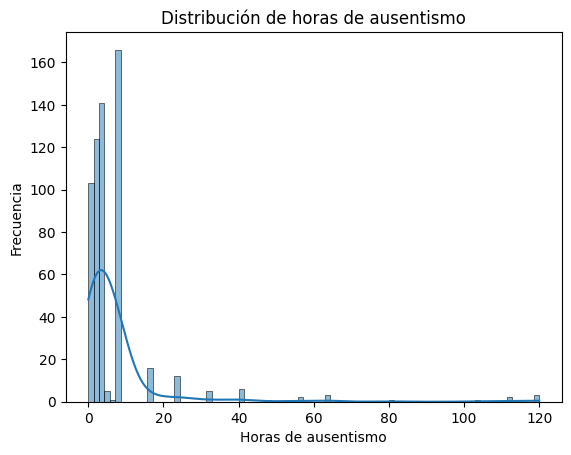

In [10]:
sns.histplot(train_set[target], kde=True)
plt.title("Distribución de horas de ausentismo")
plt.xlabel("Horas de ausentismo")
plt.ylabel("Frecuencia")
plt.show()

In [11]:
(train_set[target] == 0).sum()

np.int64(34)

In [12]:
train_set[target].unique()

array([  8,   0,   4,   1,   3,  40,   2,  24, 120,  64,  48,  56,  80,
        16,  32,   7, 104, 112,   5])

In [13]:
corr = np.abs(train_set.corr()[target]).sort_values(ascending=True)
print(corr)

Seasons                            0.002898
Weight                             0.003991
Work load Average/day              0.005682
Pet                                0.010967
Service time                       0.012037
Social smoker                      0.016085
ID                                 0.021462
Transportation expense             0.024112
Hit target                         0.034854
Month of absence                   0.035808
Education                          0.044413
Social drinker                     0.051934
Body mass index                    0.064776
Age                                0.065915
Distance from Residence to Work    0.080298
Son                                0.110058
Disciplinary failure               0.117893
Day of the week                    0.118411
Height                             0.146601
Reason for absence                 0.179406
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64


*Las correlaciones son muy bajas*

**Comprensión variables**

Feature | Tipo | Descripción |
| ------ | ---- | -------- |
Reason for absence|	Categórica nominal|	Código de razón médica/social de la ausencia (0–28).
Month of absence|	Categórica nominal	|Mes en que ocurrió la ausencia (1 = enero, ..., 12 = diciembre).
Day of the week|	Categórica nominal	|Día de la semana (2 = lunes, 3 = martes, 4 = miércoles, 5 = jueves, 6 = viernes).
Seasons	| Categórica nominal |	Estación del año (1 = verano, ..., 4 = primavera).
Transportation expense |	Numérica continua	|Gasto mensual en transporte (en euros).
Distance from Residence to Work |	Numérica continua	|Distancia desde la residencia al trabajo (en km).
Service time|	Numérica discreta|	Años de antigüedad en la empresa.
Age	|Numérica continua|	Edad del empleado (en años).
Work load Average/day |	Numérica continua	|Carga de trabajo promedio por día (en minutos). 
Hit target |	Numérica discreta |	Porcentaje de cumplimiento de objetivos.
Disciplinary failure |	Categórica binaria |	0 = no, 1 = sí (fallos disciplinarios previos).
Education |	Categórica ordinal |	Nivel educativo (1 = instituto, 2 = graduado, 3 = postgrado, 4 = doctorado).
Son |	Numérica discreta|	Número de hijos. (*tratar como categórica)
Social drinker|	Categórica binaria |	0 = no, 1 = sí (consume alcohol socialmente).
Social smoker |	Categórica binaria |	0 = no, 1 = sí (fuma en contexto social).
Pet	| Numérica discreta |	Número de mascotas. (*tratar como categórica)
Weight |	Numérica continua |	Peso del empleado (en kg).
Height |	Numérica continua	| Altura del empleado (en cm).
Body mass index (BMI)|	Numérica continua|	Índice de masa corporal. Calculado a partir de peso y altura.
Absenteeism time in hours|	Numérica continua (target)|	Total de horas de ausencia laboral.

*Decidimos como tratar `Pet`y `Son`, como númericas o categóricas según su relación con target*

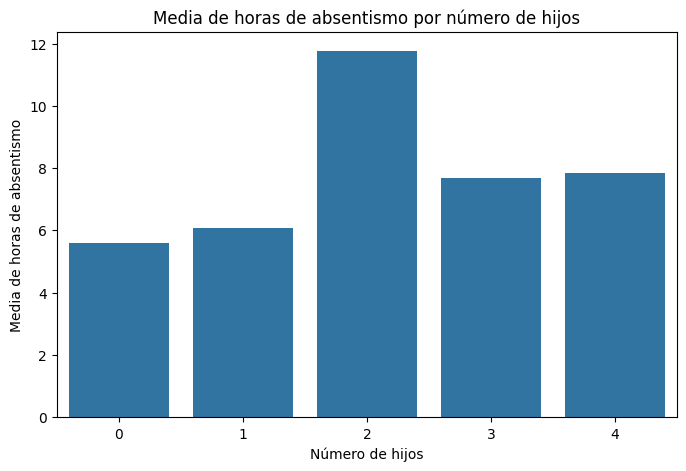

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='Son', y='Absenteeism time in hours', data=train_set, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo por número de hijos')
plt.xlabel('Número de hijos')
plt.ylabel('Media de horas de absentismo')
plt.show()

In [15]:
for val in sorted(train_set.Son.unique()):
    print(f"Son = {val}")
    print(train_set[train_set.Son == val][target].value_counts(True).sort_index())

Son = 0
Absenteeism time in hours
0     0.032389
1     0.121457
2     0.263158
3     0.206478
4     0.064777
5     0.008097
8     0.222672
16    0.032389
24    0.024291
32    0.012146
56    0.004049
64    0.008097
Name: proportion, dtype: float64
Son = 1
Absenteeism time in hours
0      0.087432
1      0.158470
2      0.196721
3      0.142077
4      0.081967
5      0.010929
7      0.005464
8      0.262295
16     0.010929
24     0.010929
40     0.021858
112    0.005464
120    0.005464
Name: proportion, dtype: float64
Son = 2
Absenteeism time in hours
0      0.052174
1      0.086957
2      0.191304
3      0.078261
4      0.043478
5      0.008696
8      0.391304
16     0.034783
24     0.026087
32     0.017391
40     0.008696
48     0.008696
64     0.008696
80     0.008696
104    0.008696
112    0.008696
120    0.017391
Name: proportion, dtype: float64
Son = 3
Absenteeism time in hours
0     0.166667
4     0.083333
8     0.666667
24    0.083333
Name: proportion, dtype: float64
Son = 4
Abse

In [16]:
def categorizar_hijos(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    else:
        return 2

train_set["Son_cat"] = train_set["Son"].apply(categorizar_hijos)
test_set["Son_cat"] = test_set["Son"].apply(categorizar_hijos)

train_set.drop(columns=["Son"], inplace=True)
test_set.drop(columns=["Son"], inplace=True)


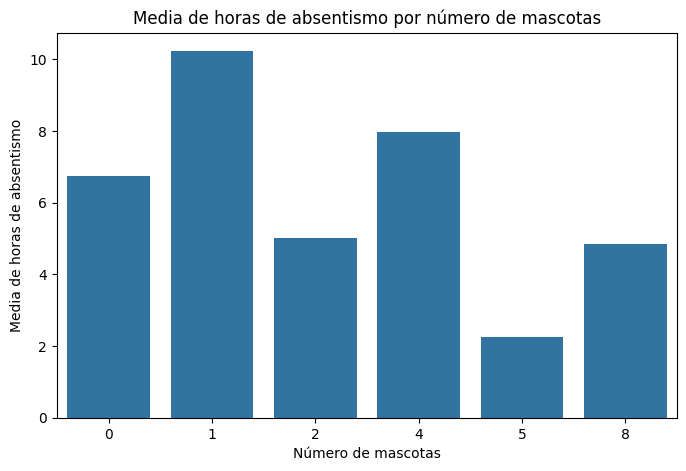

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pet', y=target, data=train_set, estimator='mean', errorbar=None)
plt.title('Media de horas de absentismo por número de mascotas')
plt.xlabel('Número de mascotas')
plt.ylabel('Media de horas de absentismo')
plt.show()


In [18]:
train_set[train_set.Pet == 0][target].value_counts(True).sort_index()

Absenteeism time in hours
0      0.057895
1      0.113158
2      0.223684
3      0.165789
4      0.086842
5      0.007895
8      0.250000
16     0.031579
24     0.026316
32     0.010526
40     0.005263
48     0.002632
56     0.005263
64     0.005263
80     0.002632
120    0.005263
Name: proportion, dtype: float64

In [19]:
train_set[train_set.Pet != 0][target].value_counts(True).sort_index()

Absenteeism time in hours
0      0.056604
1      0.122642
2      0.183962
3      0.141509
4      0.070755
5      0.009434
7      0.004717
8      0.334906
16     0.018868
24     0.009434
32     0.004717
40     0.018868
64     0.004717
104    0.004717
112    0.009434
120    0.004717
Name: proportion, dtype: float64

In [20]:
train_set['Has_pet'] = train_set['Pet'].apply(lambda x: 1 if x > 0 else 0)
test_set['Has_pet'] = test_set['Pet'].apply(lambda x: 1 if x > 0 else 0)

train_set.drop(columns=["Pet"], inplace=True)
test_set.drop(columns=["Pet"], inplace=True)

Categóricas 
* Reason for absence 
* Month of absence  
* Day of the week 
* Disciplinary failure
* Education 
* Social drinker 
* Social smoker 
* Pet
* Son

Numéricas
* Transportation expense
* Distance from Residence to Work
* Service time
* Age
* Work load Average/day
* Hit target
* Weight
* Height
* Body mass index

In [21]:
features_cat = [ "Reason for absence", "Month of absence", "Day of the week", "Disciplinary failure", "Education", "Social drinker", "Social smoker", "Has_pet", "Son_cat"]
features_num = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average/day ", "Hit target", "Weight", "Height", "Body mass index"]

Análisis visual

(20, 2)


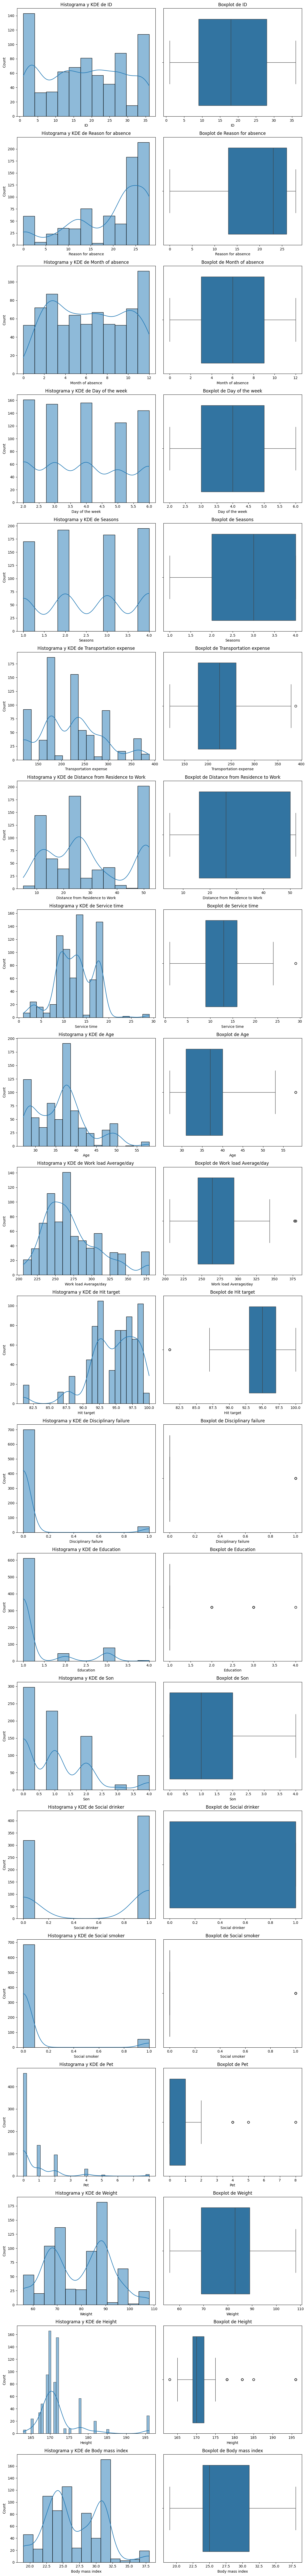

In [22]:
bt.plot_combined_graphs(df, [col for col in df.columns if col != target])

*Los outliers no parecen significativos*

**NUMÉRICAS**

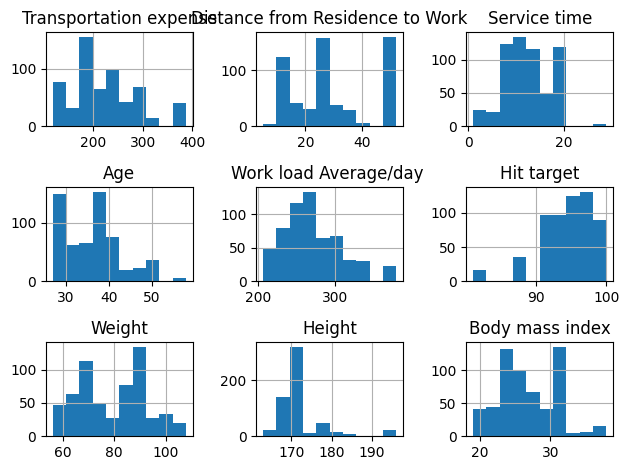

In [23]:
train_set[features_num].hist()
plt.tight_layout()

*Transformación de features*

*Aplicaremos transformaciones:*
- logaritmo: `Transportation expense`, `Work load Average/day`, `Body mass index`
- escalado estándar: `Distance from Residence to Work`, `Service time`, `Age`, `Hit target`, `Weight`, `Height`

**CATEGÓRICAS**

In [24]:
#for col in features_cat:
    #bt.plot_categorical_relationship_fin(train_set, target, col, show_values=True, relative_freq=True)

One hot encoding

In [25]:
train_set["Reason for absence"].value_counts().sort_index() #no tenemos 20 --> pero en el df tampoco

Reason for absence
0      33
1      11
3       1
4       2
5       3
6       7
7      13
8       5
9       4
10     20
11     22
12      5
13     45
14     16
15      1
16      3
18     15
19     34
21      6
22     32
23    114
24      3
25     26
26     23
27     60
28     88
Name: count, dtype: int64

Según negocio los números significan:
1. Ciertas enfermedades infecciosas y parasitarias
2. Neoplasias
3. Enfermedades de la sangre y de los órganos hematopoyéticos y ciertos trastornos que afectan al mecanismo inmunológico
4. Enfermedades endocrinas, nutricionales y metabólicas
5. Trastornos mentales y del comportamiento
6. Enfermedades del sistema nervioso
7. Enfermedades del ojo y sus anexos
8. Enfermedades del oído y de la apófisis mastoides
9. Enfermedades del sistema circulatorio
10. Enfermedades del sistema respiratorio
11. Enfermedades del sistema digestivo
12. Enfermedades de la piel y del tejido subcutáneo
13. Enfermedades del sistema osteomuscular y del tejido conjuntivo
14. Enfermedades del sistema genitourinario
15. Embarazo, parto y puerperio
16. Ciertas afecciones originadas en el período perinatal
17. Malformaciones congénitas, deformidades y anomalías cromosómicas
18. Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte
19. Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
20. Causas externas de morbilidad y mortalidad
21. Factores que influyen en el estado de salud y contacto con los servicios de salud
22. Seguimiento de pacientes
23. Consulta médica
24. Donación de sangre
25. Examen de laboratorio
26. Ausencia injustificada
27. Fisioterapia
28. Dentista

In [26]:
train_set["Month of absence"].value_counts()

Month of absence
3     77
2     61
10    53
7     52
11    45
9     45
4     45
6     44
8     43
5     42
12    42
1     40
0      3
Name: count, dtype: int64

In [27]:
train_set["Day of the week"].value_counts()

Day of the week
2    128
3    123
6    123
4    112
5    106
Name: count, dtype: int64

In [28]:
razones = {
    1:'Infectious', 2:'Neoplasms', 3:'Blood', 4:'Metabolic',
    5:'Mental', 6:'Nervous', 7:'eye', 8:'ear',
    9:'circulation', 10:'respiratory', 11:'digestive', 12:'skin',
    13:'muscles', 14:'genitourinary', 15: 'pregnancy', 16:'perinatal', 
    17:'deformations', 18:'abnormalfindings', 19:'injury-poison', 20:'mortality', 
    21:'healthstatus', 22:'follow-up', 23:'consultation', 24:'blood-donation',
    25:'lab', 26:'unjustified', 27:'physio', 28:'dentist'
}

meses = {
    1: 'Jan', 2: 'Febr', 3: 'Mar', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', 0: 'UNK'
}

dias = {
    2: 'Lunes', 3: 'Martes', 4: 'Miércoles',
    5: 'Jueves', 6: 'Viernes'
}

estaciones = {
    1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'
}

train_set["Reason for absence"] = train_set["Reason for absence"].map(razones)
train_set['Month of absence'] = train_set['Month of absence'].map(meses)
train_set['Day of the week'] = train_set['Day of the week'].map(dias)
train_set['Seasons'] = train_set['Seasons'].map(estaciones)

In [29]:
cat_feats= ["Reason for absence", "Month of absence", "Day of the week", "Seasons"]

In [30]:
X_train_cat = pd.get_dummies(train_set[cat_feats], drop_first=True)
X_test_cat = pd.get_dummies(test_set[cat_feats], drop_first=True)

# Alinear columnas para evitar errores
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

In [31]:
X_train_cat

,Reason for absence_Infectious,Reason for absence_Mental,Reason for absence_Metabolic,Reason for absence_Nervous,Reason for absence_abnormalfindings,Reason for absence_blood-donation,Reason for absence_circulation,Reason for absence_consultation,Reason for absence_dentist,Reason for absence_digestive,...,Month of absence_Oct,Month of absence_Sep,Month of absence_UNK,Day of the week_Lunes,Day of the week_Martes,Day of the week_Miércoles,Day of the week_Viernes,Seasons_Spring,Seasons_Summer,Seasons_Winter
244,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
523,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
486,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
135,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
106,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
270,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [32]:
X_train = pd.concat([train_set[features_num], X_train_cat], axis=1)
X_test = pd.concat([test_set[features_num], X_test_cat], axis=1)

In [33]:
# Transformación logarítmica para las más sesgadas
log_feats = ['Transportation expense', 'Work load Average/day ', 'Body mass index']

log1p_transformer = FunctionTransformer(np.log1p)
X_train_log = log1p_transformer.fit_transform(train_set[log_feats])
X_test_log = log1p_transformer.transform(test_set[log_feats])

robust_scaler = RobustScaler()
X_train_log_scaled = robust_scaler.fit_transform(X_train_log)
X_test_log_scaled = robust_scaler.transform(X_test_log)

# Para las demás
std_feats = ['Distance from Residence to Work', 'Service time', 'Age', 'Hit target']

standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(train_set[std_feats])
X_test_std = standard_scaler.transform(test_set[std_feats])

In [34]:
X_train_transformed_num = pd.DataFrame(
    np.hstack([X_train_log_scaled, X_train_std]),
    columns=log_feats + std_feats,
    index=train_set.index
)

X_test_transformed_num = pd.DataFrame(
    np.hstack([X_test_log_scaled, X_test_std]),
    columns=log_feats + std_feats,
    index=test_set.index)

In [35]:
X_train_transformed = pd.concat([X_train_transformed_num, X_train_cat], axis=1)
X_test_transformed = pd.concat([X_test_transformed_num, X_test_cat], axis=1)

La columna `ID` es un identificador único para cada empleado. La excluimos ya que no contiene información útil para predecir el tiempo de ausencia. También`Weight` y `Height`, ya que están en BMI

In [36]:
columns_to_exclude =["ID", "Weight", "Height"]

In [37]:
df['BMI_calculado'] = df['Weight'] / ((df['Height'] / 100) ** 2)

C:\Users\emmag\AppData\Local\Temp\ipykernel_8356\888812377.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


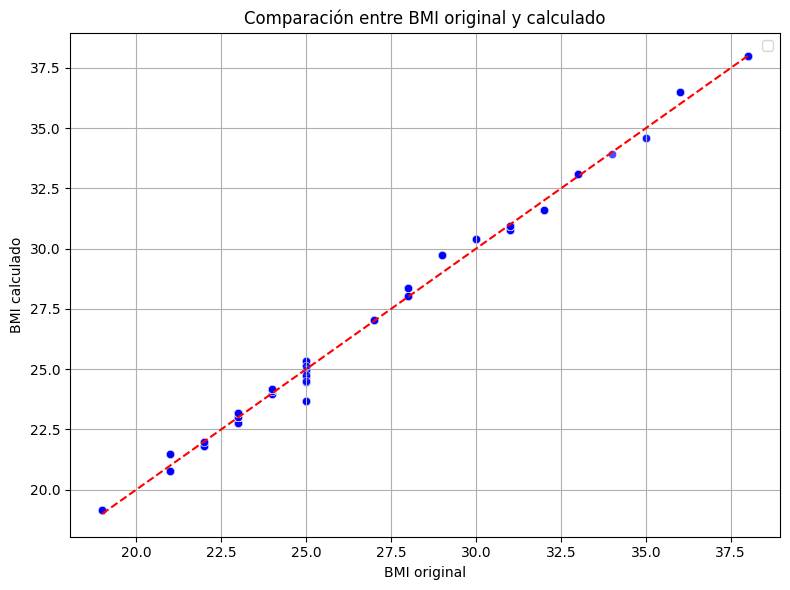

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Body mass index'], y=df['BMI_calculado'], alpha=0.7, color='blue')
plt.plot([df['Body mass index'].min(), df['Body mass index'].max()],
         [df['Body mass index'].min(), df['Body mass index'].max()],
         color='red', linestyle='--')
plt.xlabel('BMI original')
plt.ylabel('BMI calculado')
plt.title('Comparación entre BMI original y calculado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Medir diferencia absoluta promedio
diff = (df['Body mass index'] - df['BMI_calculado']).abs().mean()
print(f"Diferencia media entre BMI original y calculado: {diff:.4f}")

Diferencia media entre BMI original y calculado: 0.2154


*Por tanto añadimos las columnas restantes excepto las comentadas*

In [40]:
for col in train_set.columns:
    if col not in columns_to_exclude:
        if col != target:
            if col not in cat_feats:
                X_train_transformed[col]=train_set[col]
                X_train[col]=train_set[col]

In [41]:
for col in test_set.columns:
    if col not in columns_to_exclude:
        if col != target:
            if col not in cat_feats:
                X_test_transformed[col]=test_set[col]
                X_test[col]=test_set[col]

In [42]:
y_train = train_set[target]
y_test = test_set[target]

**MODELOS**

In [43]:
from sklearn.metrics import (
    median_absolute_error,
    mean_squared_error,
    r2_score
)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [44]:
modelos_escalados = {
    "Linear": LinearRegression(),
    "KNN": KNeighborsRegressor()
}

modelos_no_escalados = {
    "RandomF": RandomForestRegressor(random_state=42),
    "XGB": xgb.XGBRegressor(random_state=42, verbosity=0),
    "LGB": lgb.LGBMRegressor(random_state=42)
}

for nombre, model in modelos_escalados.items():
    model.fit(X_train_transformed, y_train)
    print("Modelo:", nombre, "(con datos escalados)")
    pred_train = model.predict(X_train_transformed)
    pred_test = model.predict(X_test_transformed)
    
    print("TRAIN:")
    print("\tMAE:", median_absolute_error(y_train, pred_train))
    print("\tRMSE:", root_mean_squared_error(y_train, pred_train))
    print("\tR^2:", model.score(X_train_transformed, y_train))
    
    print("TEST:")
    print("\tMAE:", median_absolute_error(y_test, pred_test))
    print("\tRMSE:", root_mean_squared_error(y_test, pred_test))
    print("\tR^2:", model.score(X_test_transformed, y_test))
    print("")


for nombre, model in modelos_no_escalados.items():
    model.fit(X_train, y_train)  # sin escalar
    print("Modelo:", nombre, "(sin datos escalados)")
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print("TRAIN:")
    print("\tMAE:", median_absolute_error(y_train, pred_train))
    print("\tRMSE:", root_mean_squared_error(y_train, pred_train))
    print("\tR^2:", model.score(X_train, y_train))
    
    print("TEST:")
    print("\tMAE:", median_absolute_error(y_test, pred_test))
    print("\tRMSE:", root_mean_squared_error(y_test, pred_test))
    print("\tR^2:", model.score(X_test, y_test))
    print("")

Modelo: Linear (con datos escalados)
TRAIN:
	MAE: 2.8686623080199163
	RMSE: 11.769539954048494
	R^2: 0.2875084183948866
TEST:
	MAE: 3.242394403937697
	RMSE: 10.26479852902381
	R^2: 0.033105368341695196

Modelo: KNN (con datos escalados)
TRAIN:
	MAE: 2.2
	RMSE: 11.934520110598092
	R^2: 0.26739364183988046
TEST:
	MAE: 3.1
	RMSE: 11.36603522591571
	R^2: -0.18548560512115841

Modelo: RandomF (sin datos escalados)
TRAIN:
	MAE: 0.57
	RMSE: 5.635667270017436
	R^2: 0.836637846006575
TEST:
	MAE: 1.7866666666666664
	RMSE: 10.557431915727314
	R^2: -0.02280977101580639

Modelo: XGB (sin datos escalados)
TRAIN:
	MAE: 0.23758447170257568
	RMSE: 0.852015663450726
	R^2: 0.9962661862373352
TEST:
	MAE: 2.7560250759124756
	RMSE: 13.134667895779545
	R^2: -0.5831297636032104

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the ov

*Random Forest es el mejor modelo porque tiene errores más bajos y mejor R² en test, es decir, generaliza mejor.*

*Pero hacemos GridSearch de todos los modelos*

In [45]:
#Linear
lr = LinearRegression()
param_lr = {
    'fit_intercept': [True, False],
}

grid_lr = GridSearchCV(lr, param_lr, cv=5, scoring='r2', n_jobs=-1)
grid_lr.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [46]:
#KNN
knn = KNeighborsRegressor()
param_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(knn, param_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [47]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
param_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 1, 5, 10],
    'min_samples_leaf': [1, 10, 20, 100],
    'max_features': ['sqrt', 'log2', None]
}
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='r2')

In [48]:
#XGB
xgb_reg = xgb.XGBRegressor(random_state=42)
param_xgb = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.1, 0.3, 0.6, 1],
    'max_depth': [1, 6, 10],  
    'min_child_weight': [1, 10, 20, 100],
    'colsample_bytree': [0.5, 1]
}
grid_xgb = GridSearchCV(xgb_reg, param_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_depth': [1, 6, 10],
                         'min_child_weight': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='r2')

In [49]:
#LGB
lgbm = lgb.LGBMRegressor(random_state=42)
param_lgbm = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.1, 0.3, 0.6, 1],
    'max_depth': [1, 6, 10, -1],
    'min_child_samples': [1, 10, 20, 100],
    'colsample_bytree': [0.5, 1]
}

grid_lgbm = GridSearchCV(lgbm, param_lgbm, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 592, number of used features: 58
[LightGBM] [Info] Start training from score 7.114865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_depth': [1, 6, 10, -1],
                         'min_child_samples': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='r2')

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluación para regresión
models = {
    "Linear": grid_lr,
    "KNN": grid_knn,
    "RandomForest": grid_rf,
    "XGBoost": grid_xgb,
    "LightGBM": grid_lgbm
}

for name, model in models.items():
    if name in ["Linear", "KNN"]:
        y_pred = model.predict(X_test_transformed)
    else:
        y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Best Params: {model.best_params_} | CV Score: {model.best_score_:.4f}")
    print(f"Test MAE: {mae:.4f} | Test RMSE: {rmse:.4f} | Test R²: {r2:.4f}\n")

Linear - Best Params: {'fit_intercept': False} | CV Score: 0.0791
Test MAE: 5.1819 | Test RMSE: 10.2675 | Test R²: 0.0326

KNN - Best Params: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'} | CV Score: -0.0647
Test MAE: 5.5574 | Test RMSE: 10.9356 | Test R²: -0.0974

RandomForest - Best Params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 400} | CV Score: 0.1238
Test MAE: 4.9633 | Test RMSE: 10.5756 | Test R²: -0.0263

XGBoost - Best Params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 200} | CV Score: 0.1722
Test MAE: 5.3553 | Test RMSE: 10.8892 | Test R²: -0.0881

LightGBM - Best Params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_samples': 1, 'n_estimators': 200} | CV Score: 0.1641
Test MAE: 5.2308 | Test RMSE: 10.7028 | Test R²: -0.0512

